## Data Challenge
### Armen Khachatrian
### CS663 - Machine Learning

In [1]:
import pandas as pd

### Background

Health Inspectors from the Health Department of the City and County of San Francisco routinely conduct inspections of restaurants (“facilities”). ​After conducting an inspection of a facility, a Health Inspector calculates a score based on the violations observed. Violations can fall into:

● High risk category: records specific violations that directly relate to the transmission of food borne illnesses, the adulteration of food products and the contamination of food-contact surfaces

● Moderate risk category: records specific violations that are of a moderate risk to the public health and safety

● Low risk category: records violations that are low risk or have no immediate risk to the public health and safety.

These violations may also be graded — i.e. converted to an inspection score — and posted, for example, on the windows of the facilities. By design, some inspections do not contain violations or inspection scores.

### Data

With these instructions, we have provided two CSV files:

● facility_scores_known.csv​(9MB):       43,199 facility records plus 1 header

● facility_scores_unknown.csv​(2MB):          10,774 facility records plus 1 header

### Requirements (Process)

There are two (2) parts for this challenge:
1. Predict inspection scores.
2. Explain inspection scores.

**Predict inspection scores**

You may use the train data to create a model for predicting inspection scores of a facility. 

The inspection score for each facility is missing from the test set. 

You must use a model to predict the inspection scores of facilities for each instance in this set.

You will submit your prediction for inspection scores, which the grader will compare against the actual values using MSE (mean squared error). 

Your prediction must be named “​preds.csv​”, a file in CSV format with the one field: inspection score. This file must have one prediction for each facility appearing in the test.csv file, in order.

In [2]:
df_train = pd.read_csv("facility_scores_known.csv")
df_train.shape

(43199, 23)

In [3]:
df_train['type_data'] = 'train'
df_train.shape

(43199, 24)

In [4]:
df_test = pd.read_csv("facility_scores_unknown.csv")
df_test.shape

(10774, 23)

In [5]:
df_test['type_data'] = 'test'
df_test.shape

(10774, 24)

In [6]:
frames = [df_train, df_test]
df = pd.concat(frames)

In [7]:
df.shape

(53973, 24)

In [8]:
df.describe()

,business_id,business_latitude,business_longitude,business_phone_number,inspection_score,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
count,53973.000000,27475.000000,27475.000000,1.767200e+04,31650.000000,27447.000000,27447.000000,27447.000000,27405.000000,27460.000000,27447.000000
mean,55218.877883,37.750969,-122.360157,1.415541e+10,86.220632,18.937990,4.810653,7.067512,7.461814,19974.613838,19.459868
std,36165.556449,0.882643,2.859985,1.356438e+06,8.487814,11.818465,2.954345,3.149427,4.469203,13340.267760,11.615126
min,19.000000,0.000000,-122.510896,1.415020e+10,45.000000,1.000000,1.000000,1.000000,1.000000,54.000000,1.000000
25%,7558.000000,37.756133,-122.437069,1.415537e+10,81.000000,6.000000,2.000000,5.000000,3.000000,308.000000,8.000000
50%,69186.000000,37.780133,-122.419107,1.415561e+10,87.000000,19.000000,4.000000,8.000000,8.000000,28855.000000,20.000000
75%,86385.000000,37.788864,-122.407417,1.415580e+10,92.000000,28.000000,8.000000,10.000000,11.000000,28859.000000,30.000000
max,102705.000000,37.824494,0.000000,1.415988e+10,100.000000,41.000000,10.000000,11.000000,15.000000,29492.000000,41.000000


In [9]:
df.columns

Index(['business_id', 'business_name', 'business_address', 'business_city',
       'business_state', 'business_postal_code', 'business_latitude',
       'business_longitude', 'business_location', 'business_phone_number',
       'inspection_id', 'inspection_date', 'inspection_score',
       'inspection_type', 'violation_id', 'violation_description',
       'risk_category', 'Neighborhoods (old)', 'Police Districts',
       'Supervisor Districts', 'Fire Prevention Districts', 'Zip Codes',
       'Analysis Neighborhoods', 'type_data'],
      dtype='object')

In [10]:
df.isna().sum()

business_id                      0
business_name                    0
business_address                 0
business_city                    0
business_state                   0
business_postal_code          1186
business_latitude            26498
business_longitude           26498
business_location            26498
business_phone_number        36301
inspection_id                    0
inspection_date                  0
inspection_score             22323
inspection_type                  0
violation_id                 13720
violation_description        13720
risk_category                13720
Neighborhoods (old)          26526
Police Districts             26526
Supervisor Districts         26526
Fire Prevention Districts    26568
Zip Codes                    26513
Analysis Neighborhoods       26526
type_data                        0
dtype: int64

In [11]:
df.business_city.unique() # All observations are in SF

array(['San Francisco'], dtype=object)

In [12]:
# temporarly cut all points that are not in SF region
df_sf = df[(df['business_latitude'] > 35) & (df['business_longitude'] < 110)] 

In [13]:
import matplotlib
import matplotlib.pyplot as plt
df_sf.plot(kind='scatter', x = 'business_longitude',y = 'business_latitude', color = 'orange')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.suptitle('Map San Francisco', size=15)
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)

In [14]:
temp = df[['inspection_score', 'inspection_type']]

In [15]:
temp[temp.isnull().any(axis=1)].inspection_type.unique() ## for which types we have missing values

array(['Complaint', 'Non-inspection site visit',
       'New Ownership - Followup', 'New Ownership',
       'Reinspection/Followup', 'Structural Inspection',
       'New Construction', 'Routine - Scheduled',
       'Complaint Reinspection/Followup',
       'Foodborne Illness Investigation', 'Routine - Unscheduled',
       'Multi-agency Investigation', 'Special Event',
       'Administrative or Document Review', 'Community Health Assessment'],
      dtype=object)

In [16]:
#All values of inspection type with score values which include missing values
types_nans = ['New Construction', 'Complaint', 'Non-inspection site visit',
       'Reinspection/Followup', 'Complaint Reinspection/Followup',
       'Foodborne Illness Investigation', 'Routine - Scheduled',
       'Structural Inspection', 'Multi-agency Investigation',
       'Routine - Unscheduled', 'New Ownership',
       'New Ownership - Followup', 'Special Event',
       'Administrative or Document Review']

In [17]:
for i in types_nans:
    if temp[temp['inspection_type'] == i].shape[0]  != temp[temp['inspection_type'] == i].isnull().sum()[0]:
        print(i)
        print("All values: ", temp[temp['inspection_type'] == i].shape[0])
        print("Missing values: ", temp[temp['inspection_type'] == i].isnull().sum()[0])

Routine - Unscheduled
All values:  39638
Missing values:  7988


*Note*: Here we see that type 'Routine - Unscheduled' has both actual values and missing values

-----------------

In [18]:
df[df.inspection_score.isnull()].inspection_type.unique()

array(['Complaint', 'Non-inspection site visit',
       'New Ownership - Followup', 'New Ownership',
       'Reinspection/Followup', 'Structural Inspection',
       'New Construction', 'Routine - Scheduled',
       'Complaint Reinspection/Followup',
       'Foodborne Illness Investigation', 'Routine - Unscheduled',
       'Multi-agency Investigation', 'Special Event',
       'Administrative or Document Review', 'Community Health Assessment'],
      dtype=object)

In [19]:
for i in types_nans:
    if df[df['inspection_type'] == i].inspection_score.shape  != df[df['inspection_type'] == i].inspection_score.isnull().sum():
        print(i)
        print("All values: ", df[df['inspection_type'] == i].inspection_score.shape[0])
        print("Missing values: ", df[df['inspection_type'] == i].inspection_score.isnull().sum())
        print("Existing values: ", df[df['inspection_type'] == i].inspection_score.shape[0] - df[df['inspection_type'] == i].inspection_score.isnull().sum())

Routine - Unscheduled
All values:  39638
Missing values:  7988
Existing values:  31650


In [20]:
#Put 0 for missing values in business_score 
df.inspection_score = df.inspection_score.fillna(0)
df.inspection_score.isna().any()

False

In [21]:
df.isnull().sum()

business_id                      0
business_name                    0
business_address                 0
business_city                    0
business_state                   0
business_postal_code          1186
business_latitude            26498
business_longitude           26498
business_location            26498
business_phone_number        36301
inspection_id                    0
inspection_date                  0
inspection_score                 0
inspection_type                  0
violation_id                 13720
violation_description        13720
risk_category                13720
Neighborhoods (old)          26526
Police Districts             26526
Supervisor Districts         26526
Fire Prevention Districts    26568
Zip Codes                    26513
Analysis Neighborhoods       26526
type_data                        0
dtype: int64

In [22]:
#The next part is to eliminate missing values for other columns
#Clearly, latitude, longitude,location, phone number do not make sense for building model
#Lets focus on postal code
df[['business_address','business_postal_code']]

,business_address,business_postal_code
0,1362 Stockton St,94133
1,1408 Clement St,94118
2,1 Kearny St,94108
3,4615 Mission St,94112
4,552 Jones St,94102
...,...,...
10769,510 Mission St,94105
10770,345 Taylor St,94102
10771,142 McAllister St,94102
10772,2298 Mission St,94110


In [23]:
df[df.business_postal_code.isna()]['business_address'].unique()

array(['Off The Grid', 'Off the Grid', '298 King St',
       '370 Golden Gate Ave', '101 Horne Ave',
       '24 Willie Mays Pl Field Level Rm 1.11.11', 'Approved Locations',
       'Off the grid', '699 Avenue of the Palms', '2948 Folsom St',
       '510 Stevenson St', '625 Clement St',
       '24 Willie Mays Pl View Lvl Sect 331', '705 Natoma St',
       '3435 Mission St', 'OFF THE GRID', '582 Sutter St',
       '450 Church St', '1 franklin Ct', '140 New Montgomery St',
       'Hunters Point Building 110 Shipyard', '1975 Bryant',
       '3914 Judah St', '839 Clay', '2462 San Bruno Ave',
       '2277 Shafter Ave', '2078 Hayes St', '484 Ellis St',
       'Golden Gate Park, Carousel Snack Bar', 'Various Farmers Markets',
       '842 Geary St', '1552 Ocean Ave', '3200 24th St', '3251 Pierce',
       '1737 Post St 368', '1 Warriors Way Level 300 South West',
       'Approved private locations', '833 Bryant St', '2229 Clement St',
       '3109 24th St', 'OTG', '2399 Van Ness Ave',
       '24

#### Replacing values in Business postal code

In [24]:
df.business_postal_code.unique() #some postal codes are not in a proper value

array(['94133', '94118', '94108', '94112', '94102', '94114', '94103',
       '94107', '94110', '94104', nan, '94105', '94115', '94123', '94134',
       '94122', '94117', '94121', '94130', '94124', '94116', '94158',
       '94111', '94109', '94127', '94131', '95133', '94132', '94188',
       '95122', '95109', 'Ca', '94101', '95117', '94901', '941102019',
       '94602', '94013', '94080', '95132', '94143', '94544', '94122-1909',
       '94102-5917', '64110', '94301', '94105-1420', '94518',
       '94117-3504', '94123-3106', '94621', '94124-1917', '00000',
       '94129', '95105', '941033148', 'CA', '94105-2907', '94120',
       '95112', '94014', '941', '92672', '0'], dtype=object)

In [25]:
dataTypeSeries = df.dtypes
print('Data type of each column of Dataframe :')
print(dataTypeSeries)
#We have to change the type of business postal code to numeric

Data type of each column of Dataframe :
business_id                    int64
business_name                 object
business_address              object
business_city                 object
business_state                object
business_postal_code          object
business_latitude            float64
business_longitude           float64
business_location             object
business_phone_number        float64
inspection_id                 object
inspection_date               object
inspection_score             float64
inspection_type               object
violation_id                  object
violation_description         object
risk_category                 object
Neighborhoods (old)          float64
Police Districts             float64
Supervisor Districts         float64
Fire Prevention Districts    float64
Zip Codes                    float64
Analysis Neighborhoods       float64
type_data                     object
dtype: object


In [26]:
df[(df.business_postal_code == '941102019')|(df.business_postal_code == '941')|(df.business_postal_code == '94122-1909')][['business_address', 
                                                                                                                    'business_postal_code']]
#Checked with map - postal code is 94110 for 2929 19th St
#1 YACHT Rd	: 94123 - map
#1518 IRVING ST = 94122

,business_address,business_postal_code
1474,2929 19th St,941102019
4232,1518 IRVING ST,94122-1909
5711,2929 19th St,941102019
10952,1518 IRVING ST,94122-1909
26291,1 YACHT Rd,941
27581,2929 19th St,941102019
32402,1 YACHT Rd,941
35279,1 YACHT Rd,941
36700,1 YACHT Rd,941
36872,2929 19th St,941102019


In [27]:
#Part 2
df[(df.business_postal_code == 'Ca')|(df.business_postal_code == 'CA')|(df.business_postal_code == '94105-1420')][['business_address', 
                                                                                                                    'business_postal_code']]
#2250 Chestnut St: 94123 - map
#1 MARKET ST. FL - 94105
#2301 Mission St - 94110
#for Public just put 94118

,business_address,business_postal_code
422,2250 Chestnut St,Ca
2330,2250 Chestnut St,Ca
7068,1 MARKET ST. FL,94105-1420
13779,2301 Mission St,CA
21673,2250 Chestnut St,Ca
23743,Public,CA
24973,2250 Chestnut St,Ca
25759,2250 Chestnut St,Ca
28164,Public,CA
28289,2250 Chestnut St,Ca


In [28]:
#Part 3 
df[(df.business_postal_code == '94102-5917')|(df.business_postal_code == '94117-3504')|(df.business_postal_code == '64110')][['business_address', 
                                                                                                                    'business_postal_code']]

#332 Valencia St - mistake: should be 94103
#45 ROSE ST - 94102
#200 FILLMORE ST - 94117

,business_address,business_postal_code
4265,45 ROSE ST,94102-5917
5139,332 Valencia St,64110
5913,332 Valencia St,64110
8634,200 FILLMORE ST,94117-3504
10583,332 Valencia St,64110
10591,332 Valencia St,64110
10985,200 FILLMORE ST,94117-3504
11134,332 Valencia St,64110
11848,200 FILLMORE ST,94117-3504
12707,332 Valencia St,64110


In [29]:
#Part 4
df[(df.business_postal_code == '94123-3106')|(df.business_postal_code == '94124-1917')|(df.business_postal_code == '00000')][['business_address', 
                                                                                                                    'business_postal_code']]
#1312 CHESTNUT ST - 94123
#240 INDUSTRIAL ST - 94124
#OFF THE GRID - 94129

,business_address,business_postal_code
8915,1312 CHESTNUT ST,94123-3106
10377,240 INDUSTRIAL ST,94124-1917
11423,1312 CHESTNUT ST,94123-3106
11862,OFF THE GRID,00000
12665,240 INDUSTRIAL ST,94124-1917
14336,240 INDUSTRIAL ST,94124-1917
19124,OFF THE GRID,00000
21852,1312 CHESTNUT ST,94123-3106
22709,OFF THE GRID,00000
2648,240 INDUSTRIAL ST,94124-1917


In [30]:
df[(df.business_postal_code == '94105-2907')|(df.business_postal_code == '0')|(df.business_postal_code == '941033148')][['business_address', 
                                                                                                                         'business_postal_code']]
#560 MISSION ST - 94105
#OFF THE GRID - 94129 
#390 CLEMENTINA St - 94103

,business_address,business_postal_code
12475,390 CLEMENTINA St,941033148
13921,560 MISSION ST,94105-2907
21559,390 CLEMENTINA St,941033148
23008,390 CLEMENTINA St,941033148
23457,390 CLEMENTINA St,941033148
736,560 MISSION ST,94105-2907
1875,OFF THE GRID,0
2085,OFF THE GRID,0
5471,390 CLEMENTINA St,941033148
5734,OFF THE GRID,0


In [31]:
import numpy as np
df.loc[df['business_address'] == '560 MISSION ST', 'business_postal_code'] = 94105
df.loc[df['business_address'] == 'OFF THE GRID', 'business_postal_code'] = 94129
df.loc[df['business_address'] == '1312 CHESTNUT ST', 'business_postal_code'] = 94123
df.loc[df['business_address'] == '240 INDUSTRIAL ST', 'business_postal_code'] = 94124
df.loc[df['business_address'] == '332 Valencia St', 'business_postal_code'] = 94103
df.loc[df['business_address'] == '45 ROSE ST', 'business_postal_code'] = 94102
df.loc[df['business_address'] == '200 FILLMORE ST', 'business_postal_code'] = 94117
df.loc[df['business_address'] == '2250 Chestnut St', 'business_postal_code'] = 94123
df.loc[df['business_address'] == '1 MARKET ST. FL', 'business_postal_code'] = 94105
df.loc[df['business_address'] == 'Public', 'business_postal_code'] = 94118
df.loc[df['business_address'] == '2929 19th St', 'business_postal_code'] = 94110
df.loc[df['business_address'] == '1 YACHT Rd', 'business_postal_code'] = 94123
df.loc[df['business_address'] == '1518 IRVING ST', 'business_postal_code'] = 94122
df.loc[df['business_address'] == '2301 Mission St', 'business_postal_code'] = 94110
df.loc[df['business_address'] == '390 CLEMENTINA St', 'business_postal_code'] = 94103

In [32]:
df.business_postal_code.unique() #checking values --- GOOD!

array(['94133', '94118', '94108', '94112', '94102', '94114', '94103',
       '94107', '94110', '94104', nan, '94105', '94115', '94123', '94134',
       '94122', '94117', '94121', '94130', '94124', '94116', '94158',
       '94111', '94109', '94127', '94131', '95133', '94132', '94188',
       '95122', '95109', 94123, '94101', '95117', '94901', 94110, 94129,
       '94602', '94013', '94080', '95132', '94143', '94544', 94122, 94102,
       94103, '94301', 94105, '94518', 94117, '94621', 94124, '94129',
       '95105', '94120', '95112', '94014', 94118, '92672'], dtype=object)

In [33]:
df[df.business_postal_code.isna()][['business_address', 'business_postal_code']]
#1172 rows with NaNs

,business_address,business_postal_code
15,Off The Grid,NaN
16,Off the Grid,NaN
21,298 King St,NaN
53,298 King St,NaN
65,370 Golden Gate Ave,NaN
...,...,...
10004,Golden Gate Park,NaN
10243,Off The Grid,NaN
10255,685 Market St 520,NaN
10437,1717 Harrison St,NaN


In [34]:
df[df.business_postal_code.isna()]['business_address'].unique()

array(['Off The Grid', 'Off the Grid', '298 King St',
       '370 Golden Gate Ave', '101 Horne Ave',
       '24 Willie Mays Pl Field Level Rm 1.11.11', 'Approved Locations',
       'Off the grid', '699 Avenue of the Palms', '2948 Folsom St',
       '510 Stevenson St', '625 Clement St',
       '24 Willie Mays Pl View Lvl Sect 331', '705 Natoma St',
       '3435 Mission St', '582 Sutter St', '450 Church St',
       '1 franklin Ct', '140 New Montgomery St',
       'Hunters Point Building 110 Shipyard', '1975 Bryant',
       '3914 Judah St', '839 Clay', '2462 San Bruno Ave',
       '2277 Shafter Ave', '2078 Hayes St', '484 Ellis St',
       'Golden Gate Park, Carousel Snack Bar', 'Various Farmers Markets',
       '842 Geary St', '1552 Ocean Ave', '3200 24th St', '3251 Pierce',
       '1737 Post St 368', '1 Warriors Way Level 300 South West',
       'Approved private locations', '833 Bryant St', '2229 Clement St',
       '3109 24th St', 'OTG', '2399 Van Ness Ave',
       '24 Willie Mays Pl 

In [35]:
resul = df[['business_address', 'business_postal_code']]
print("Missing Values: ", resul.isna().sum())
print("All Values: ", resul.shape[0])

Missing Values:  business_address           0
business_postal_code    1172
dtype: int64
All Values:  53973


In [36]:
df.loc[(df['business_address'] == 'Off The Grid') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94129.0
df.loc[(df['business_address'] == 'Off the Grid') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94129.0
df.loc[(df['business_address'] == '298 King St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94107.0
df.loc[(df['business_address'] == '370 Golden Gate Ave') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94102.0
df.loc[(df['business_address'] == '101 Horne Ave') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94124.0
df.loc[(df['business_address'] == '24 Willie Mays Pl Field Level Rm 1.11.11') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94107.0
df.loc[(df['business_address'] == 'Approved Locations') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94118.0
df.loc[(df['business_address'] == 'Off the grid') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94129.0
df.loc[(df['business_address'] == '699 Avenue of the Palms') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94130.0
df.loc[(df['business_address'] == '2948 Folsom St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94110.0
df.loc[(df['business_address'] == '510 Stevenson St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94103.0
df.loc[(df['business_address'] == '625 Clement St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94118.0
df.loc[(df['business_address'] == '24 Willie Mays Pl View Lvl Sect 331') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94107.0
df.loc[(df['business_address'] == '705 Natoma St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94103.0
df.loc[(df['business_address'] == '3435 Mission St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94110.0
df.loc[(df['business_address'] == '582 Sutter St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94102.0
df.loc[(df['business_address'] == '450 Church St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94114.0
df.loc[(df['business_address'] == '1 franklin Ct') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94123.0
df.loc[(df['business_address'] == '140 New Montgomery St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94105.0
df.loc[(df['business_address'] == 'Hunters Point Building 110 Shipyard') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94134.0
df.loc[(df['business_address'] == '1975 Bryant') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94110.0
df.loc[(df['business_address'] == '3914 Judah St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94122.0
df.loc[(df['business_address'] == '839 Clay') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94108.0
df.loc[(df['business_address'] == '2462 San Bruno Ave') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94134.0
df.loc[(df['business_address'] == '2277 Shafter Ave') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94124.0
df.loc[(df['business_address'] == '2078 Hayes St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94117.0
df.loc[(df['business_address'] == '484 Ellis St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94102.0
df.loc[(df['business_address'] == 'Golden Gate Park, Carousel Snack Bar') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94118.0
df.loc[(df['business_address'] == 'Various Farmers Markets') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94117.0
df.loc[(df['business_address'] == '842 Geary St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94109.0
df.loc[(df['business_address'] == '1552 Ocean Ave') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94112.0
df.loc[(df['business_address'] == '3200 24th St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94110.0
df.loc[(df['business_address'] == '3251 Pierce') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94123.0
df.loc[(df['business_address'] == '1737 Post St 368') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94115.0

df.loc[(df['business_address'] == '1 Warriors Way Level 300 South West') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94158.0
df.loc[(df['business_address'] == 'Approved private locations') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94120.0
df.loc[(df['business_address'] == '833 Bryant St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94103.0
df.loc[(df['business_address'] == '2229 Clement St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94121.0
df.loc[(df['business_address'] == '3109 24th St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94110.0
df.loc[(df['business_address'] == 'OTG') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94129.0
df.loc[(df['business_address'] == '2399 Van Ness Ave') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94109.0
df.loc[(df['business_address'] == '24 Willie Mays Pl Room 2142') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94107.0
df.loc[(df['business_address'] == 'OFF The Grid') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94129.0
df.loc[(df['business_address'] == '3200 Fillmore St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94123.0
df.loc[(df['business_address'] == '151 3rd St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 93463.0
df.loc[(df['business_address'] == '24 Willie Mays Pl View Sect 320 Rm 5319') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94107.0
df.loc[(df['business_address'] == '420 Mason St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94102.0
df.loc[(df['business_address'] == '845 Market St #13') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94103.0
df.loc[(df['business_address'] == '3611 18th St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94110.0
df.loc[(df['business_address'] == '1001 Potrero Ave') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94110.0
df.loc[(df['business_address'] == '2 Marina Blvd Fort Mason') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94123.0
df.loc[(df['business_address'] == '144 Taylor St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94122.0
df.loc[(df['business_address'] == '425 Barneveld Ave') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94124.0
df.loc[(df['business_address'] == '24 Willie Mays Pl Rm 2103') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94107.0
df.loc[(df['business_address'] == '871 Sutter St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94109.0
df.loc[(df['business_address'] == 'TFF Event Operations') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94109.0
df.loc[(df['business_address'] == '79 Sansome St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94104.0
df.loc[(df['business_address'] == 'Soma Street @ 428 11th St.') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94103.0
df.loc[(df['business_address'] == '610 Long Bridge') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94158.0
df.loc[(df['business_address'] == '1801 Vicente St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94116.0
df.loc[(df['business_address'] == 'Golden Gate Park, JFK Dr.@Conservatory of Flowers') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94118.0
df.loc[(df['business_address'] == '6134 Geary Blvd') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94121.0
df.loc[(df['business_address'] == '10 29th St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94110.0
df.loc[(df['business_address'] == 'Soma Street Food Park') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94103.0
df.loc[(df['business_address'] == 'NW Corner Grant at Geary St on Grant') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94108.0
df.loc[(df['business_address'] == '1800 Owens St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94158.0
df.loc[(df['business_address'] == 'Macys - Geary Entrance') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94102.0


df.loc[(df['business_address'] == '500 Post St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94102.0
df.loc[(df['business_address'] == 'Treasure Island') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94130.0
df.loc[(df['business_address'] == '1051 Market St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94103.0
df.loc[(df['business_address'] == '255 Winston St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94132.0
df.loc[(df['business_address'] == '400 California') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94104.0
df.loc[(df['business_address'] == 'Golden Gate Park, Music Concourse') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94118.0
df.loc[(df['business_address'] == '428 11th St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94103.0
df.loc[(df['business_address'] == '66 Kearny St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94108.0
df.loc[(df['business_address'] == '655 Montgomery St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94111.0
df.loc[(df['business_address'] == '491 Bayshore St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94124.0
df.loc[(df['business_address'] == '2351 Mission St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94110.0
df.loc[(df['business_address'] == "333 O'Farrell") & (df['business_postal_code'].isna()), ['business_postal_code']] = 94102.0
df.loc[(df['business_address'] == '942 Mission St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94103.0
df.loc[(df['business_address'] == 'Mission St, betw 10th & 11th St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94103.0
df.loc[(df['business_address'] == '928 Toland') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94124.0
df.loc[(df['business_address'] == 'Approved Private Locations') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94120.0
df.loc[(df['business_address'] == '1400 Stockton St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94133.0
df.loc[(df['business_address'] == '659 Merchant St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94111.0
df.loc[(df['business_address'] == '11 Phelan Ave') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94112.0
df.loc[(df['business_address'] == '1111 California St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94108.0
df.loc[(df['business_address'] == 'Beach Chalet Soccer Field Parking Lot') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94121.0
df.loc[(df['business_address'] == 'Private & Public') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94118.0
df.loc[(df['business_address'] == '1143 Taraval St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94116.0

df.loc[(df['business_address'] == '3861 24th St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94114.0
df.loc[(df['business_address'] == '235 Front St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94111.0
df.loc[(df['business_address'] == '550 Gough St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94102.0
df.loc[(df['business_address'] == '855 Bush St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94108.0
df.loc[(df['business_address'] == 'Private Location') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94129.0
df.loc[(df['business_address'] == '135 04th St FC-3') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94103.0
df.loc[(df['business_address'] == '201 2nd St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94105.0
df.loc[(df['business_address'] == "170 O'Farrell St") & (df['business_postal_code'].isna()), ['business_postal_code']] = 94102.0
df.loc[(df['business_address'] == '1760 Polk St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94109.0
df.loc[(df['business_address'] == '2206 Polk St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94109.0
df.loc[(df['business_address'] == '681 Broadway St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94133.0
df.loc[(df['business_address'] == '115 Sansome') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94104.0
df.loc[(df['business_address'] == 'Pier 39 West Perimeter') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94133.0
df.loc[(df['business_address'] == '525 Market/360 Valencia') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94103.0
df.loc[(df['business_address'] == '301 25th Ave') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94121.0
df.loc[(df['business_address'] == '55 Stockton St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94108.0
df.loc[(df['business_address'] == '250 WEST PORTAL AVENUE') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94127.0
df.loc[(df['business_address'] == '100 Diamond St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94114.0
df.loc[(df['business_address'] == '1605 Jerrold Ave') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94124.0
df.loc[(df['business_address'] == '1717 Harrison St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94103.0
df.loc[(df['business_address'] == '515 CORTLAND AVE') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94110.0
df.loc[(df['business_address'] == 'Justin Herman Plaza') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94105.0
df.loc[(df['business_address'] == '550 Gene Friends Way') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94158.0
df.loc[(df['business_address'] == '550 D Gene Friend Way') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94158.0
df.loc[(df['business_address'] == 'Golden Gate Park, JFK Dr.@8th Ave') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94118.0
df.loc[(df['business_address'] == '203 Parnassus Ave') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94117.0
df.loc[(df['business_address'] == '3801 18th St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94114.0
df.loc[(df['business_address'] == '685 Market St 520') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94105.0
df.loc[(df['business_address'] == '3918 Judah St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94122.0
df.loc[(df['business_address'] == '24 Willie Mays Plaza') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94107.0
df.loc[(df['business_address'] == '750 Font Blvd') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94132.0
df.loc[(df['business_address'] == '3055 23rd St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94110.0
df.loc[(df['business_address'] == 'Golden Gate Park, Spreckles Lake') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94121.0
df.loc[(df['business_address'] == '2 Embarcadero Center  Street Level') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94111.0
df.loc[(df['business_address'] == '1301 Cesar Chavez St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94124.0
df.loc[(df['business_address'] == '550 A Gene Friend Way') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94158.0
df.loc[(df['business_address'] == '428 11th') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94103.0
df.loc[(df['business_address'] == '4033 Judah St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94122.0
df.loc[(df['business_address'] == 'Off The Grid-Upper Haight') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94117.0
df.loc[(df['business_address'] == '2826 Jones St') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94133.0
df.loc[(df['business_address'] == 'Treasure Island Flea Market') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94130.0
df.loc[(df['business_address'] == 'Off The Grid') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94129.0
df.loc[(df['business_address'] == 'Golden Gate Park') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94118.0
df.loc[(df['business_address'] == 'Music Concourse in Golden Gate Park') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94118.0
df.loc[(df['business_address'] == '3251 20th Ave') & (df['business_postal_code'].isna()), ['business_postal_code']] = 94132.0

##### Replacing all NaNs via Google Map

In [37]:
resul = df[['business_address', 'business_postal_code']]
print("Missing Values: ", resul.isna().sum())
print("All Values: ", resul.shape[0])
#No misssing Values anymore ---- GOOD!

Missing Values:  business_address        0
business_postal_code    0
dtype: int64
All Values:  53973


In [38]:
#to numeric
df.business_postal_code = df.business_postal_code.apply(int)
df.dtypes

business_id                    int64
business_name                 object
business_address              object
business_city                 object
business_state                object
business_postal_code           int64
business_latitude            float64
business_longitude           float64
business_location             object
business_phone_number        float64
inspection_id                 object
inspection_date               object
inspection_score             float64
inspection_type               object
violation_id                  object
violation_description         object
risk_category                 object
Neighborhoods (old)          float64
Police Districts             float64
Supervisor Districts         float64
Fire Prevention Districts    float64
Zip Codes                    float64
Analysis Neighborhoods       float64
type_data                     object
dtype: object

In [39]:
#Check other missing values
df.isna().sum()

business_id                      0
business_name                    0
business_address                 0
business_city                    0
business_state                   0
business_postal_code             0
business_latitude            26498
business_longitude           26498
business_location            26498
business_phone_number        36301
inspection_id                    0
inspection_date                  0
inspection_score                 0
inspection_type                  0
violation_id                 13720
violation_description        13720
risk_category                13720
Neighborhoods (old)          26526
Police Districts             26526
Supervisor Districts         26526
Fire Prevention Districts    26568
Zip Codes                    26513
Analysis Neighborhoods       26526
type_data                        0
dtype: int64

In [40]:
#Date converting
#Implicit connections can be related to the time or date
df["inspection_date"] = pd.to_datetime(df["inspection_date"], format='%m/%d/%Y %I:%M:%S %p')

df["Minute"] = df["inspection_date"].dt.minute
df["Hour"] = df["inspection_date"].dt.hour
df["Day"] = df["inspection_date"].dt.day
df["Month"] = df["inspection_date"].dt.month
df['weekday'] = df['inspection_date'].dt.weekday_name
df['week_year'] = df['inspection_date'].dt.weekofyear

In [41]:
#Decide which column will be encoded
print(df.violation_id.nunique())
print(df.violation_description.nunique())
print(df.risk_category.nunique())
print(df.inspection_type.nunique())
#Here we see that using id or risk category is useless. 
#Violation_id has 40210 unique values -- almost equal to number of instances
#Risk category is very poor
#Decision: to encode violation description and inspection type

40210
65
3
15


In [42]:
df.violation_description = df.violation_description.fillna('No Info') 
#replaced missing value with "No information"

In [43]:
df.violation_description.isna().any() 

False

In [44]:
#Using Encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df['inspection_type_num'] = le.fit_transform(df['inspection_type'])
df['violation_description_num'] = le.fit_transform(df['violation_description'])
df['weekday_num'] = le.fit_transform(df['weekday'])

In [45]:
dataTypeSeries = df.dtypes
print('Data type of each column of Dataframe :')
print(dataTypeSeries)

Data type of each column of Dataframe :
business_id                           int64
business_name                        object
business_address                     object
business_city                        object
business_state                       object
business_postal_code                  int64
business_latitude                   float64
business_longitude                  float64
business_location                    object
business_phone_number               float64
inspection_id                        object
inspection_date              datetime64[ns]
inspection_score                    float64
inspection_type                      object
violation_id                         object
violation_description                object
risk_category                        object
Neighborhoods (old)                 float64
Police Districts                    float64
Supervisor Districts                float64
Fire Prevention Districts           float64
Zip Codes                           

In [46]:
df.isna().sum() 

business_id                      0
business_name                    0
business_address                 0
business_city                    0
business_state                   0
business_postal_code             0
business_latitude            26498
business_longitude           26498
business_location            26498
business_phone_number        36301
inspection_id                    0
inspection_date                  0
inspection_score                 0
inspection_type                  0
violation_id                 13720
violation_description            0
risk_category                13720
Neighborhoods (old)          26526
Police Districts             26526
Supervisor Districts         26526
Fire Prevention Districts    26568
Zip Codes                    26513
Analysis Neighborhoods       26526
type_data                        0
Minute                           0
Hour                             0
Day                              0
Month                            0
weekday             

In [47]:
temp = df[df['Neighborhoods (old)'].isna()][['business_postal_code', 'Neighborhoods (old)', 'Police Districts', 'Supervisor Districts', 'Analysis Neighborhoods']]
temp

,business_postal_code,Neighborhoods (old),Police Districts,Supervisor Districts,Analysis Neighborhoods
0,94133,NaN,NaN,NaN,NaN
1,94118,NaN,NaN,NaN,NaN
2,94108,NaN,NaN,NaN,NaN
3,94112,NaN,NaN,NaN,NaN
4,94102,NaN,NaN,NaN,NaN
...,...,...,...,...,...
10769,94105,NaN,NaN,NaN,NaN
10770,94102,NaN,NaN,NaN,NaN
10771,94102,NaN,NaN,NaN,NaN
10772,94110,NaN,NaN,NaN,NaN


In [48]:
print(df['Neighborhoods (old)'].nunique())
print(df['Police Districts'].nunique())
print(df['Supervisor Districts'].nunique())
print(df['Analysis Neighborhoods'].nunique())

41
10
11
41


In [49]:
df[df['Neighborhoods (old)'].notna()][['Neighborhoods (old)', 'Analysis Neighborhoods']]
#difficult to see any correlations between these two variables

,Neighborhoods (old),Analysis Neighborhoods
26,5.0,7.0
63,19.0,20.0
78,6.0,8.0
97,10.0,9.0
147,19.0,20.0
...,...,...
10751,6.0,8.0
10752,19.0,20.0
10753,35.0,35.0
10754,19.0,20.0


In [50]:
temp.business_postal_code.nunique()#46 different postal codes for Neighborhoods (old) missing values

46

In [51]:
#eliminating NaNs
#Imputer
from sklearn.impute import SimpleImputer
columns = ['Neighborhoods (old)','Police Districts','Supervisor Districts','Fire Prevention Districts','Zip Codes','Analysis Neighborhoods']

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean=imp_mean.fit(df[columns])
df[columns] = imp_mean.fit_transform(df[columns])
#Added the most frequent values 

In [52]:
data = df[['business_id', 'business_postal_code', 'inspection_score',
          'Neighborhoods (old)', 'Police Districts', 'Supervisor Districts',
          'Fire Prevention Districts', 'Analysis Neighborhoods', 'type_data', 
            'Day', 'Month', 'week_year', 'violation_description_num',
          'weekday_num', 'inspection_type_num']]

In [53]:
data.dtypes 
#all values are numeric, except type of data, this variable i will use an initially split by train/test 

business_id                    int64
business_postal_code           int64
inspection_score             float64
Neighborhoods (old)          float64
Police Districts             float64
Supervisor Districts         float64
Fire Prevention Districts    float64
Analysis Neighborhoods       float64
type_data                     object
Day                            int64
Month                          int64
week_year                      int64
violation_description_num      int64
weekday_num                    int64
inspection_type_num            int64
dtype: object

In [54]:
data.isna().any() #no missing values

business_id                  False
business_postal_code         False
inspection_score             False
Neighborhoods (old)          False
Police Districts             False
Supervisor Districts         False
Fire Prevention Districts    False
Analysis Neighborhoods       False
type_data                    False
Day                          False
Month                        False
week_year                    False
violation_description_num    False
weekday_num                  False
inspection_type_num          False
dtype: bool

In [55]:
data.shape #number of instances is exactly as same as number of observations in raw data 

(53973, 15)

In [56]:
data.corr()

,business_id,business_postal_code,inspection_score,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Analysis Neighborhoods,Day,Month,week_year,violation_description_num,weekday_num,inspection_type_num
business_id,1.000000,0.012200,-0.084730,-0.003990,0.002146,0.040323,0.046261,-0.005268,0.028517,-0.025758,-0.023683,-0.005186,-0.047103,-0.087538
business_postal_code,0.012200,1.000000,-0.015189,-0.000173,0.011040,-0.065566,-0.042687,0.003672,0.000325,0.021310,0.021142,0.010261,-0.009203,-0.020933
inspection_score,-0.084730,-0.015189,1.000000,-0.000668,-0.007990,-0.001807,-0.013850,-0.001381,-0.007485,-0.000320,0.000011,-0.039579,0.034541,0.533207
Neighborhoods (old),-0.003990,-0.000173,-0.000668,1.000000,0.341318,-0.194044,0.113504,0.982804,0.007623,-0.016422,-0.015939,0.005077,-0.005419,-0.013140
Police Districts,0.002146,0.011040,-0.007990,0.341318,1.000000,-0.426838,0.251943,0.328704,0.009189,-0.014723,-0.014854,0.017302,-0.001129,-0.019729
Supervisor Districts,0.040323,-0.065566,-0.001807,-0.194044,-0.426838,1.000000,-0.080216,-0.207931,-0.007982,0.005110,0.004807,-0.015296,-0.008410,0.005514
Fire Prevention Districts,0.046261,-0.042687,-0.013850,0.113504,0.251943,-0.080216,1.000000,0.078185,0.012811,-0.035946,-0.034575,0.007014,-0.025093,-0.010006
Analysis Neighborhoods,-0.005268,0.003672,-0.001381,0.982804,0.328704,-0.207931,0.078185,1.000000,0.010035,-0.014835,-0.014143,0.003046,-0.005609,-0.011881
Day,0.028517,0.000325,-0.007485,0.007623,0.009189,-0.007982,0.012811,0.010035,1.000000,-0.027299,0.058015,0.001998,-0.007746,0.000485
Month,-0.025758,0.021310,-0.000320,-0.016422,-0.014723,0.005110,-0.035946,-0.014835,-0.027299,1.000000,0.995421,0.002122,0.000626,-0.017845


In [57]:
#Conclusion for Matrix correlation:
#Analysis Neighborhoods and Neighborhoods (old) are higly correlated >0.98 - so we will drop one of them
#Month and week_year are also higly correlated >0.99 - so we will drop one of them
#We avoid multicollinearity because otherwise 
#assumption (explanatory variables have to be independent) will be violated

In [58]:
data = data.drop(columns = ['Analysis Neighborhoods', 'Month', 'inspection_type_num'])
data.columns

Index(['business_id', 'business_postal_code', 'inspection_score',
       'Neighborhoods (old)', 'Police Districts', 'Supervisor Districts',
       'Fire Prevention Districts', 'type_data', 'Day', 'week_year',
       'violation_description_num', 'weekday_num'],
      dtype='object')

In [59]:
train = data[data['type_data'] == 'train']
test = data[data['type_data'] == 'test']
train = train.drop(columns = ['type_data'])
test = test.drop(columns = ['type_data'])

X_train = train.drop('inspection_score', axis=1)
y_train = train['inspection_score'] 

#### Model

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

model = RandomForestRegressor() 

# 10-Fold Cross validation
print(np.mean(cross_val_score(model, X_train, y_train, cv=10)))

/Users/a.khachatryan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/a.khachatryan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/a.khachatryan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/a.khachatryan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/a.kha

0.586642793196853


In [61]:
from sklearn.model_selection import GridSearchCV
param_grid = {
                 'n_estimators': [5, 10, 15, 20, 25, 30],
                 'max_depth': [2, 5, 7, 9, 11, 13]
             }

grid = GridSearchCV(model, param_grid, cv=10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 5, 7, 9, 11, 

In [62]:
print("Best estimators: ", grid.best_estimator_)
print("Best parameters: ", grid.best_params_)
print("CV results: ", grid.cv_results_)

Best estimators:  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=25,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
Best parameters:  {'max_depth': 13, 'n_estimators': 25}
CV results:  {'mean_fit_time': array([0.0852685 , 0.1592334 , 0.25692289, 0.38806901, 0.40175972,
       0.48466611, 0.181322  , 0.33765576, 0.52119954, 0.68900807,
       0.84605308, 1.07205641, 0.23280032, 0.47797112, 0.7009109 ,
       0.95586805, 1.17157612, 1.37036633, 0.32686138, 0.61017954,
       0.88277798, 1.13970282, 1.44321451, 1.78300745, 0.34314902,
       0.7120065 , 1.09413066, 1.4482908 , 1.81217351, 2.07774367,
       0.41938834, 0.80457621, 1

In [63]:
X_test = test.drop('inspection_score', axis=1)
y_test = test['inspection_score'] 

In [64]:
model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = np.array(y_pred, dtype='int')
y_pred[y_pred > 100] = 100 # the maximum can be only 100.
y_pred

array([ 0,  1, 55, ..., 12, 10, 82])

In [65]:
from scipy import stats
stats.describe(y_pred)

DescribeResult(nobs=10774, minmax=(0, 99), mean=62.38787822535734, variance=916.0113298891889, skewness=-1.146380655116475, kurtosis=-0.4831125908639291)

In [66]:
names = X_train.columns

In [67]:
#feature importance
print(sorted(zip(map(lambda x: round(x, 9), model.feature_importances_), names), reverse=True))

[(0.703989386, 'violation_description_num'), (0.117877252, 'business_id'), (0.049016398, 'week_year'), (0.038640868, 'Day'), (0.032442903, 'business_postal_code'), (0.021727143, 'weekday_num'), (0.010690966, 'Neighborhoods (old)'), (0.01066583, 'Fire Prevention Districts'), (0.007758749, 'Police Districts'), (0.007190506, 'Supervisor Districts')]


In [68]:
df_test['inspection_score'] = y_pred

In [69]:
df_test['inspection_score']

0         0
1         1
2        55
3        16
4        72
         ..
10769    82
10770    76
10771    12
10772    10
10773    82
Name: inspection_score, Length: 10774, dtype: int64

In [70]:
np.savetxt("preds.csv", df_test['inspection_score'], delimiter="\n")

In [83]:
np.savetxt("preds_otherformat.csv", df_test['inspection_score'], delimiter=",")

#### Visualizations

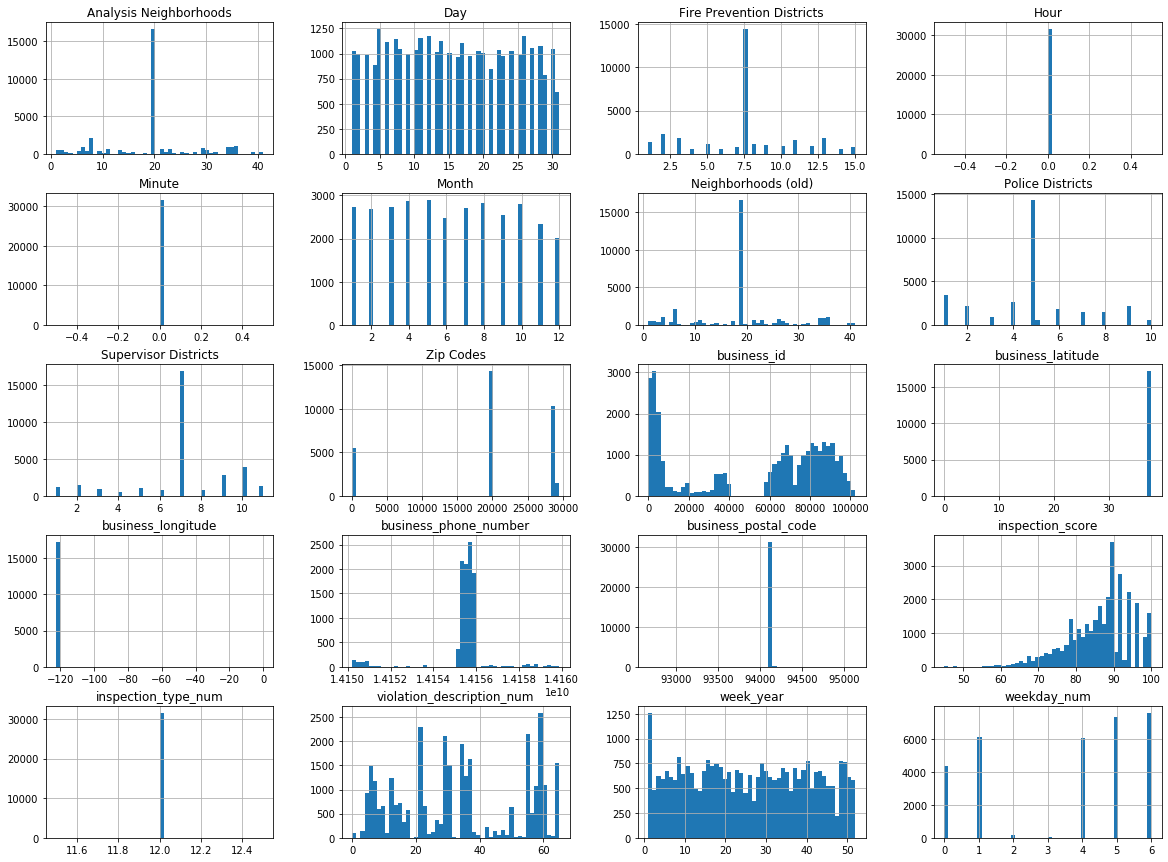

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

temp = df[df.inspection_score>0]
temp.hist(bins=50, figsize=(20,15))
plt.show()

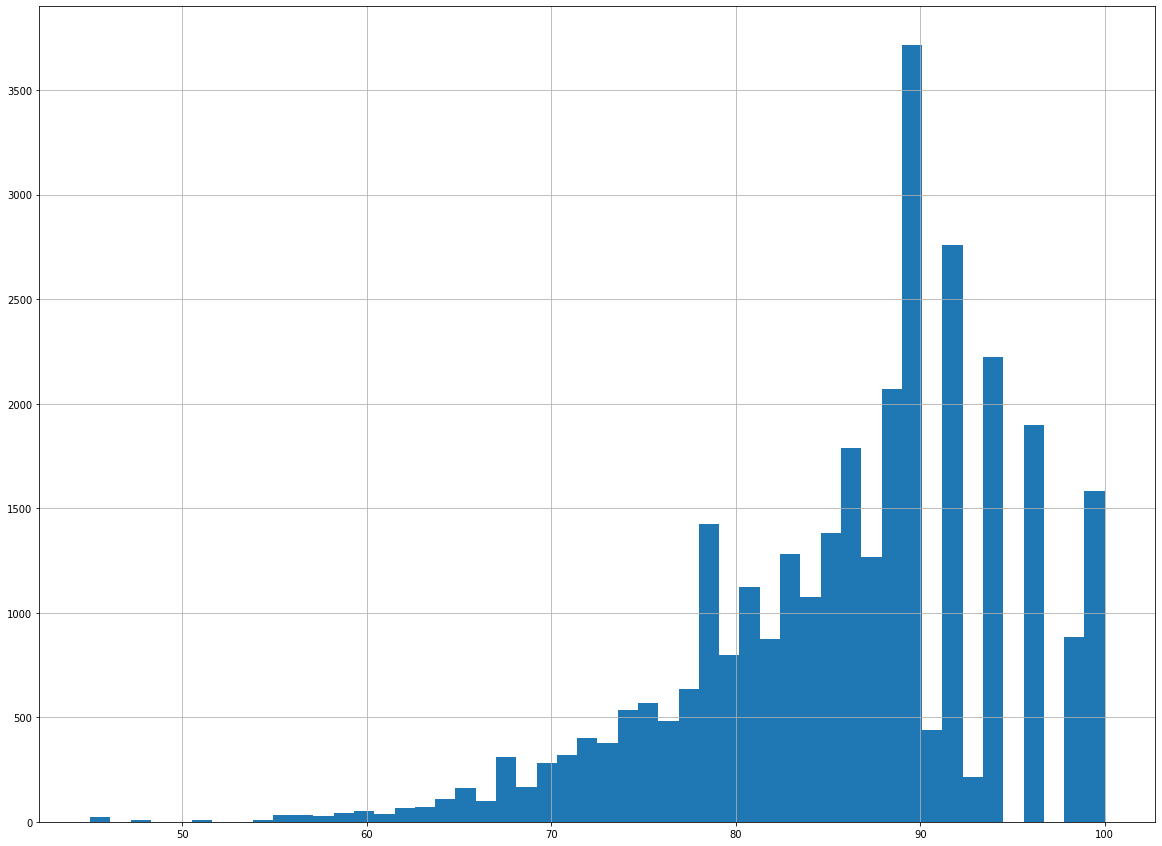

In [81]:
temp.inspection_score.hist(bins=50, figsize=(20,15))
plt.show()

In [74]:
names.shape[0]

10

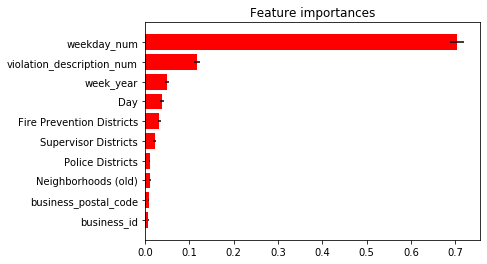

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.title("Feature importances")
importances = model.feature_importances_
indices = np.argsort(importances)
std = np.std([feat.feature_importances_ for feat in model.estimators_],
             axis=0)
plt.barh(range(names.shape[0]), importances[indices],
       color="r", xerr=std[indices], align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(names.shape[0]), names)
plt.ylim([-1, names.shape[0]])
plt.show()